<a href="https://colab.research.google.com/github/Ilirjana2/FormatREADME/blob/main/TripData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Share Trip Data**
Houston BCycle is a non-profit organization that operates a bicycle sharing system for the City of Houston. With over 150 stations and 1300 bicycles, users can check out bikes, ride around the city, and dock them back at any station.

**Age**: The system has been operational for 11 years.

**Funding**: Expansion primarily funded by the government. However, there's no subsidy for operational costs, leading to challenges in maintaining the growing number of bikes and stations.

**Revenue**: As new stations are added in less trafficked areas, revenue per station has decreased.

##**Challenges**

1. **Operational Costs**: While the government funds expansion, it doesn't subsidize operational costs.

2. **Station Imbalance**: Some stations frequently run out of bikes, while others get too full. This imbalance leads to lost revenue opportunities and increased operational challenges.

##**Solutions**
1. **Operational Efficiency**:

* Analyze data to improve efficiency within the organization.
Maintain a bike-to-dock ratio of 50/70 to ensure stations neither run out of bikes nor get too full.

* Address challenges like relocating bikes and handling cases where users can't dock at their desired station.

2. **Increase Funding**:

* Seek additional funds through philanthropy or increased government support.
* Demonstrate the value of the BCycle network by showcasing its impact on the city and advocating its importance as a transportation option.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_excel("/content/drive/MyDrive/DataJam_BikeShare/BikeShare.xlsx")

**Exploratory Data Analysis**

**Data Content**:

* Bike share stations, including their installation date, name, status (suspended or not), address, and several other attributes.

* Demographic data points related to the median household income, race, and population for the areas where these stations are located.

In [9]:
data.head()

,NON DEMOGRAPHIC DATA FROM,Reporting,Owner,Installation Date,Station Name,suspended?,Adresses,number,street,city,...,AC Plugin,Dock,Bikes Ordered via TIP,census tract geoID,median household income tract,is income reliable?,% white residents tract,is race reliable?,population?,percent white residents per tract??
0,https://github.com/houstondatavis/data-jam-aug...,TIP,COH,2021-08-26 00:00:00,EaDo Stadium METRORail,1 Supended,"2220 Texas Ave. Houston, TX 77003",427,WICKENDEN ST,PROVIDENCE,...,NaN,13.0,NaN,14000US44007003700,69049.0,1.0,0.645240,1.0,11954.0,0.645240
1,https://github.com/houstondatavis/data-jam-aug...,TIP,COH,2017-10-25 00:00:00,Rice U. Gibbs Rec & Wellness,1 Suspended,"20 Alumni Dr., Houston, TX 77005",600,FIFTH AV,PROVIDENCE,...,NaN,9.0,13.0,14000US44007002400,73464.0,1.0,0.627608,1.0,14820.0,0.627608
2,https://github.com/houstondatavis/data-jam-aug...,TIP,COH,2017-10-25 00:00:00,Rice U. Greenbriar Lot,1 Suspended,"5650 Greenbriar Dr., Houston, TX 77005",49,BURROWS ST,PROVIDENCE,...,NaN,18.0,18.0,14000US44007001500,54188.0,1.0,0.265577,1.0,24107.0,0.265577
3,https://github.com/houstondatavis/data-jam-aug...,TIP,COH,2019-07-23 00:00:00,8th Wonder,1 Suspended,"2202 Dallas St., Houston, TX 77003",17,WEYMOUTH ST,PROVIDENCE,...,NaN,15.0,10.0,14000US44007003400,172019.0,1.0,0.765329,1.0,30472.0,0.765329
4,https://github.com/houstondatavis/data-jam-aug...,TIP,COH,2018-06-26 00:00:00,Bobcat Teddys,1 Suspended,"2803 White Oak Dr., Houston, TX 77007",358,BROAD ST,PROVIDENCE,...,NaN,9.0,6.0,14000US44007000700,15451.0,1.0,0.089837,0.0,8794.0,0.089837


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NON DEMOGRAPHIC DATA FROM            26 non-null     object 
 1   Reporting                            116 non-null    object 
 2   Owner                                161 non-null    object 
 3   Installation Date                    161 non-null    object 
 4   Station Name                         161 non-null    object 
 5   suspended?                           102 non-null    object 
 6   Adresses                             161 non-null    object 
 7   number                               285 non-null    object 
 8   street                               296 non-null    object 
 9   city                                 300 non-null    object 
 10  state                                300 non-null    object 
 11  zip                             

**Data Visualization**

Bike-to-dock ratio:

In [15]:
#bike-to-dock ratio
data['Bike-to-Dock Ratio'] = data['Bikes Ordered via TIP'] / data['Dock']

# Filter out stations with missing data for bikes or docks
filtered_data = data.dropna(subset=['Bikes Ordered via TIP', 'Dock'])

# Display stations with the highest and lowest bike-to-dock ratios
highest_ratio = filtered_data.nlargest(5, 'Bike-to-Dock Ratio')
lowest_ratio = filtered_data.nsmallest(5, 'Bike-to-Dock Ratio')

highest_ratio[['Station Name', 'Bike-to-Dock Ratio']], lowest_ratio[['Station Name', 'Bike-to-Dock Ratio']]


(                         Station Name  Bike-to-Dock Ratio
 1        Rice U. Gibbs Rec & Wellness            1.444444
 8       Rice U. Cambridge Office Bldg            1.076923
 67  BioScience Research Collaborative            1.076923
 2              Rice U. Greenbriar Lot            1.000000
 7                   Montie Beach Park            1.000000,
                                Station Name  Bike-to-Dock Ratio
 15  5th Ward / Denver Harbor Transit Center                 0.0
 24                            Finnigan Park                 0.0
 26                       Heights Waterworks                 0.0
 31              Mickey Leland Memorial Park                 0.0
 68                           Change Happens                 0.0)

**Stations with the Highest Bike-to-Dock Ratios**:

Rice U. Gibbs Rec & Wellness: 1.44 (indicating more bikes than docks)

Rice U. Cambridge Office Bldg: 1.08

BioScience Research Collaborative: 1.08

Rice U. Greenbriar Lot: 1.00

Montie Beach Park: 1.00



**Stations with the Lowest Bike-to-Dock Ratios**:

5th Ward / Denver Harbor Transit Center: 0.00 (indicating no bikes available)

Finnigan Park: 0.00

Heights Waterworks: 0.00

Mickey Leland Memorial Park: 0.00

Change Happens: 0.00

**Desired Bike-to-Dock Ratio**: for every 70 docks, 50 should have bikes in them, and the remaining 20 should be empty

Desired ratio of 50/70 (.7143) means that ideally, 50% of the capacity (docks) should be occupied by bikes:

1. Calculate the bike-to-dock ratio for each station.

2. Determine how many stations have ratios above, below, or equal to the desired ratio.


In [16]:
desired_ratio = 50 / 70

# Calculate how many stations are above, below, or at the desired ratio
above_desired = filtered_data[filtered_data['Bike-to-Dock Ratio'] > desired_ratio].shape[0]
below_desired = filtered_data[filtered_data['Bike-to-Dock Ratio'] < desired_ratio].shape[0]
at_desired = filtered_data[filtered_data['Bike-to-Dock Ratio'] == desired_ratio].shape[0]

above_desired, below_desired, at_desired

(30, 80, 0)

30 stations have a bike-to-dock ratio above the desired ratio of 0.7143.

80 stations have a bike-to-dock ratio below the desired ratio.

No stations have a bike-to-dock ratio exactly equal to the desired ratio

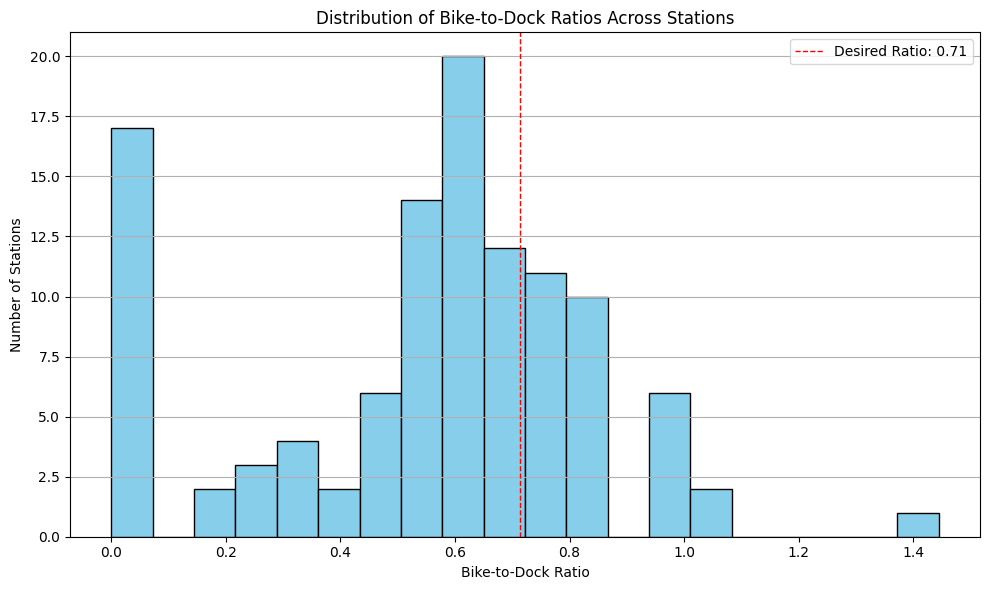

In [17]:
# Plot the distribution of bike-to-dock ratios
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Bike-to-Dock Ratio'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(desired_ratio, color='red', linestyle='dashed', linewidth=1, label=f'Desired Ratio: {desired_ratio:.2f}')
plt.xlabel('Bike-to-Dock Ratio')
plt.ylabel('Number of Stations')
plt.title('Distribution of Bike-to-Dock Ratios Across All Stations')
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Geospatial visualization of the distribution and inbalance in the bike-to-dock ratio across the city:

**Red**: Significantly below the desired ratio (indicating a potential shortage of bikes)

**Yellow**: Close to the desired ratio (indicating a balanced situation)

**Green**: Above the desired ratio (indicating a potential surplus of bikes)

In [18]:
import folium

# Create a base map centered around Houston
houston_map = folium.Map(location=[29.7604, -95.3698], zoom_start=12)

# Function to determine marker color based on bike-to-dock ratio
def determine_color(ratio):
    if ratio < desired_ratio * 0.7:
        return 'red'
    elif desired_ratio * 0.7 <= ratio <= desired_ratio * 1.3:
        return 'yellow'
    else:
        return 'green'

# Add each station as a marker on the map
for idx, row in filtered_data.iterrows():
    color = determine_color(row['Bike-to-Dock Ratio'])
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"Station: {row['Station Name']}<br>Ratio: {row['Bike-to-Dock Ratio']:.2f}",
        icon=folium.Icon(color=color)
    ).add_to(houston_map)

houston_map

<ipython-input-18-276fdb307f18>:21: UserWarning: color argument of Icon should be one of: {'beige', 'cadetblue', 'blue', 'purple', 'green', 'red', 'lightred', 'lightblue', 'orange', 'darkpurple', 'lightgray', 'darkred', 'black', 'lightgreen', 'white', 'darkblue', 'gray', 'darkgreen', 'pink'}.
  icon=folium.Icon(color=color)
